In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1장

## 그리디 - 평균 구하기

In [2]:
np.random.seed(0)

rewards = []

for n in range(1, 10, 1) :
    r = np.random.rand()
    rewards.append(r)
    Q = sum(rewards) / n

    print(Q)

0.5488135039273248
0.6320014351498722
0.6222554154571294
0.6029123573420713
0.567060845741438
0.5801997236289743
0.5598265075766483
0.6013198192273272
0.6415801460355164


## 그리디 - 증분

In [3]:
np.random.seed(0)
Q = 0

for n in range(1, 10, 1) :
    r = np.random.rand()
    Q = Q + (r - Q) / n

    print(Q)


0.5488135039273248
0.6320014351498722
0.6222554154571294
0.6029123573420713
0.567060845741438
0.5801997236289743
0.5598265075766483
0.6013198192273272
0.6415801460355164


## 밴디트

In [4]:
class Bandit :
    def __init__(self, arms = 10):
        self.rates = np.random.rand(arms)
    
    def play(self, arm) :
        rate = self.rates[arm]
        if (rate > np.random.rand()) :
            return 1
        else : return 0

In [5]:
bandit = Bandit()
for i in range(3) :
    print(bandit.play(0))

0
0
0


In [8]:
bandit = Bandit()

Q = 0

for i in range(1, 11, 1) :
    r = bandit.play(0)
    Q += (r - Q) / n

    print(Q)

0.0
0.1111111111111111
0.09876543209876543
0.19890260631001372
0.2879134278311233
0.3670341580721096
0.4373636960640974
0.4998788409458644
0.5554478586185461
0.6048425409942632


In [13]:
bandit = Bandit()

Qs = np.zeros(10)
ns = np.zeros(10)

for n in range(1, 11, 1) :
    action = np.random.randint(0, 10)
    r = bandit.play(action)

    ns[action] += 1
    Qs[action] += (r - Qs[action]) / ns[action]

print(ns, Qs, bandit.rates)

[0. 1. 3. 0. 1. 1. 0. 2. 0. 2.] [0. 0. 1. 0. 1. 0. 0. 1. 0. 0.] [0.99884701 0.1494483  0.86812606 0.16249293 0.61555956 0.12381998
 0.84800823 0.80731896 0.56910074 0.4071833 ]


## 밴디트 - 에이전트

In [14]:
class Agent :
    def __init__(self, epsilon, action_size = 10): 
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)

    def update(self, action, reward) :
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

    def get_action(self) : 
        if (np.random.rand() < self.epsilon) :
            return np.random.randint(0, len(Qs))
        else : return np.argmax(self.Qs)

891


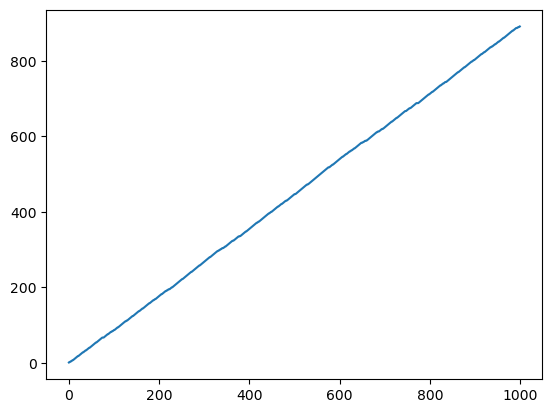

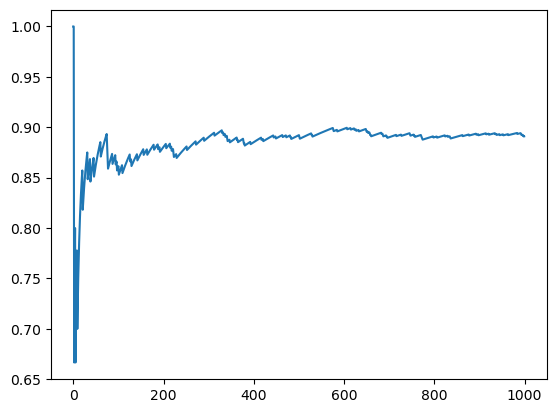

In [20]:
steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon=epsilon)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps) :
    action = agent.get_action()
    reward = bandit.play(action)
    agent.update(action=action, reward=reward)
    total_reward += reward
    total_rewards.append(total_reward)
    rates.append(total_reward / (step + 1))


print(total_reward)
plt.plot(total_rewards)
plt.show()

plt.plot(rates)
plt.show()

## 밴디트 - 비정상 문제

In [21]:
class NonStatBandit : 
    def __init__(self, arms = 10):
        self.arms = arms
        self.rates = np.random.rand(arms)

    def play(self, arm) :
        rate = self.rates(arm)
        self.rates += 0.1 * np.random.randn(self.arms) #노이즈 추가
        if (rate > np.random.rand()) : return 1
        else : return 0

In [24]:
class AlphaAgent : 
    def __init__(self, epsilon, alpha, actions = 10):
        self.epsilon = epsilon
        self.Qs = np.zeros(actions)
        self.alpha = alpha

    def update(self, action, reward) :
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha # 1/n 대신 alpha
    
    def get_action(self) :
        if (np.random.rand() < self.epsilon) :
            return np.random.randint(0, len(self.Qs))
        else : return np.argmax(self.Qs) # greedy policy

# 2장 

## 마르코프 - 등비수열 합

In [34]:
gamma = 0.9

V = 0

V += 1

for i in range(1, 100) :
    V += -1 * (gamma) ** i

print(V)

V = 0

V = 1 + (-gamma * (1 / (1 - gamma)))

print(V)

-7.999734386011124
-8.000000000000002
